In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [17]:
clf.predict(X)  # predict classes of the training data

array([0, 1])

In [18]:
clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

array([0, 1])

In [19]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10],
     [2,  7]]
# scale data according to computed scaling values
StandardScaler().fit(X).transform(X)

array([[-1.22474487,  1.05522364],
       [ 0.        , -1.34301191],
       [ 1.22474487,  0.28778827]])

In [20]:
import pandas as pd
pd.DataFrame(X)

,0,1
0,0,15
1,1,-10
2,2,7


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=3)
print(X_train[:5], y_train[:5])
print(X_test[:5], y_test[:5])

[[6.4 2.7 5.3 1.9]
 [6.2 2.2 4.5 1.5]
 [6.4 2.8 5.6 2.1]
 [5.8 2.7 3.9 1.2]
 [4.6 3.6 1.  0.2]] [2 1 2 1 0]
[[4.6 3.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.  1.6 0.2]
 [5.7 4.4 1.5 0.4]] [0 0 0 0 0]


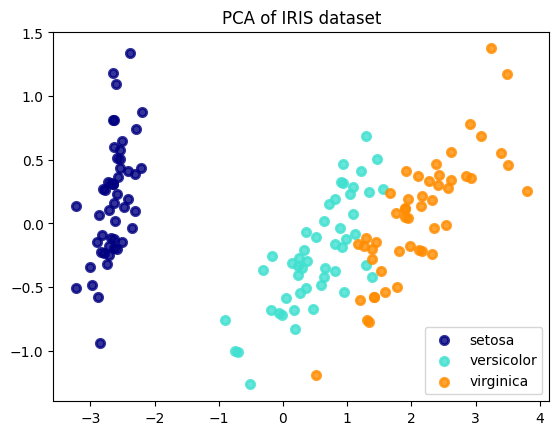

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# 시각화
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()

In [23]:
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# fit the whole pipeline
pipe.fit(X_train, y_train)
# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

In [24]:
# create a pipeline object
pipe = make_pipeline(
    PCA(n_components=2),
    LogisticRegression()
)

# fit the whole pipeline
pipe.fit(X_train, y_train)
# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9473684210526315

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 10),
                       'max_depth': randint(5, 20)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=10,
                            param_distributions=param_distributions,
                            verbose =1,
                            random_state=0)

search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce93091d2d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce931c50fa0>},
                   random_state=0, verbose=1)

In [26]:
search

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce93091d2d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce931c50fa0>},
                   random_state=0, verbose=1)

In [27]:
search.best_params_

{'max_depth': 12, 'n_estimators': 9}

In [28]:
# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

0.7661427823631044

In [29]:
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=10,
                            param_distributions=param_distributions,
                            cv = 3,
                            verbose =1,
                            random_state=0)

In [30]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce93091d2d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce931c50fa0>},
                   random_state=0, verbose=1)

In [31]:
search.cv_results_

{'mean_fit_time': array([0.53406962, 0.14779226, 0.42949859, 0.42859077, 0.14805913,
        0.52358166, 0.57176177, 0.09334993, 0.33499304, 0.39559857]),
 'std_fit_time': array([0.07191922, 0.01434112, 0.12112481, 0.03174685, 0.00066672,
        0.03210747, 0.11614692, 0.00144588, 0.00111116, 0.00421644]),
 'mean_score_time': array([0.01263865, 0.00568922, 0.01101987, 0.00479698, 0.00410358,
        0.00700251, 0.0072333 , 0.00243902, 0.00502499, 0.00598351]),
 'std_score_time': array([3.65133158e-03, 4.42436583e-03, 4.56941670e-03, 8.20684358e-04,
        1.48397010e-03, 3.03850581e-03, 1.71067147e-03, 2.30103781e-05,
        1.06851489e-04, 1.08344974e-04]),
 'param_max_depth': masked_array(data=[17, 5, 16, 12, 10, 9, 11, 13, 11, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[6, 4, 4, 4, 3, 8, 9, 2, 8, 9],
              ma

In [32]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.534070,0.071919,0.012639,0.003651,17,6,"{'max_depth': 17, 'n_estimators': 6}",0.758150,0.747083,0.762639,0.755957,0.006537,4
1,0.147792,0.014341,0.005689,0.004424,5,4,"{'max_depth': 5, 'n_estimators': 4}",0.670871,0.646880,0.667790,0.661847,0.010658,10
2,0.429499,0.121125,0.011020,0.004569,16,4,"{'max_depth': 16, 'n_estimators': 4}",0.739275,0.725693,0.749705,0.738224,0.009831,7
3,0.428591,0.031747,0.004797,0.000821,12,4,"{'max_depth': 12, 'n_estimators': 4}",0.748988,0.730725,0.750081,0.743265,0.008878,6
4,0.148059,0.000667,0.004104,0.001484,10,3,"{'max_depth': 10, 'n_estimators': 3}",0.720876,0.716264,0.731416,0.722852,0.006342,8
5,0.523582,0.032107,0.007003,0.003039,9,8,"{'max_depth': 9, 'n_estimators': 8}",0.751344,0.736311,0.753833,0.747163,0.007740,5
6,0.571762,0.116147,0.007233,0.001711,11,9,"{'max_depth': 11, 'n_estimators': 9}",0.767755,0.753879,0.772311,0.764648,0.007839,2
7,0.093350,0.001446,0.002439,0.000023,13,2,"{'max_depth': 13, 'n_estimators': 2}",0.676396,0.685669,0.671743,0.677936,0.005789,9
8,0.334993,0.001111,0.005025,0.000107,11,8,"{'max_depth': 11, 'n_estimators': 8}",0.762880,0.750968,0.768956,0.760935,0.007471,3
9,0.395599,0.004216,0.005984,0.000108,12,9,"{'max_depth': 12, 'n_estimators': 9}",0.770947,0.756860,0.773630,0.767146,0.007355,1


In [33]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 20]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [34]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001927,0.002101,0.000648,0.000204,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000809,0.000023,0.000496,0.000018,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.0,0.966667,0.021082,5
2,0.000641,0.000025,0.000399,0.000014,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.000625,0.000021,0.000405,0.000009,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.000604,0.000003,0.000447,0.000083,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,5
5,0.000689,0.000070,0.000496,0.000164,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1


In [35]:
from sklearn.ensemble import RandomForestClassifier

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=3)

# Random Forest 모델 정의
rf = RandomForestClassifier()

# 탐색할 하이퍼파라미터 범위 설정
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Random Search 수행
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1
                                   )

random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 50}
Best accuracy found:  0.9739130434782609


In [36]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 M

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
data = pd.DataFrame(iris.data, columns= iris.feature_names)
data['target'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
from pycaret.classification import *
s = setup(data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [20]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.8330
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0430
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0270
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0280
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1710
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0290
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.1230
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.2690
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0290
rf,Random Forest Classifier,0.9264,0.9909,0.9264,0.9343,0.9232,0.8886,0.8956,0.1470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [21]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **[Optimize_Hyperparameter Tuning with corss validation](https://pycaret.gitbook.io/docs/get-started/functions/optimize)**

In [23]:
# train model
rf = create_model('rf')

# tune model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9870,0.9091,0.9273,0.9076,0.8625,0.8735
1,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.6364,0.9221,0.6364,0.6364,0.6121,0.4500,0.4743
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9571,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
print(rf)
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=10, n_jobs=-1,
                       oob_sc

In [26]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…